# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
X_2d = iris.data[:, :2]
mask = iris.target < 2
X_2d = X_2d[mask]
y_2d = iris.target[mask]
print(X_2d.shape)
print(y_2d.shape)
print(X_2d[:5])
print(y_2d[:5])

(100, 2)
(100,)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[0 0 0 0 0]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

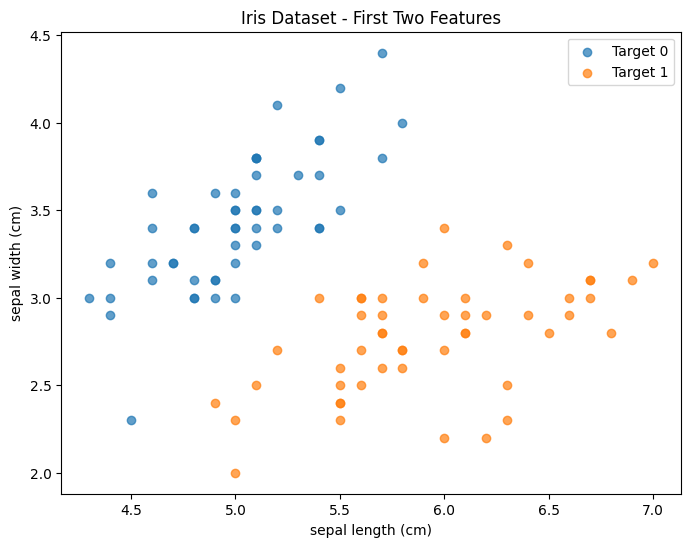

In [5]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[y_2d == 0, 0], X_2d[y_2d == 0, 1], label='Target 0', alpha=0.7)
plt.scatter(X_2d[y_2d == 1, 0], X_2d[y_2d == 1, 1], label='Target 1', alpha=0.7)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title('Iris Dataset - First Two Features')
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [6]:
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)

SVMmodel = SVC(kernel='linear', C=200)
SVMmodel.fit(X_train_2d, y_train_2d)

accuracy = SVMmodel.score(X_test_2d, y_test_2d)
print(f"SVM Accuracy with C=200: {accuracy:.4f}")
print(f"Support vectors count: {len(SVMmodel.support_vectors_)}")

SVM Accuracy with C=200: 1.0000
Support vectors count: 4


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

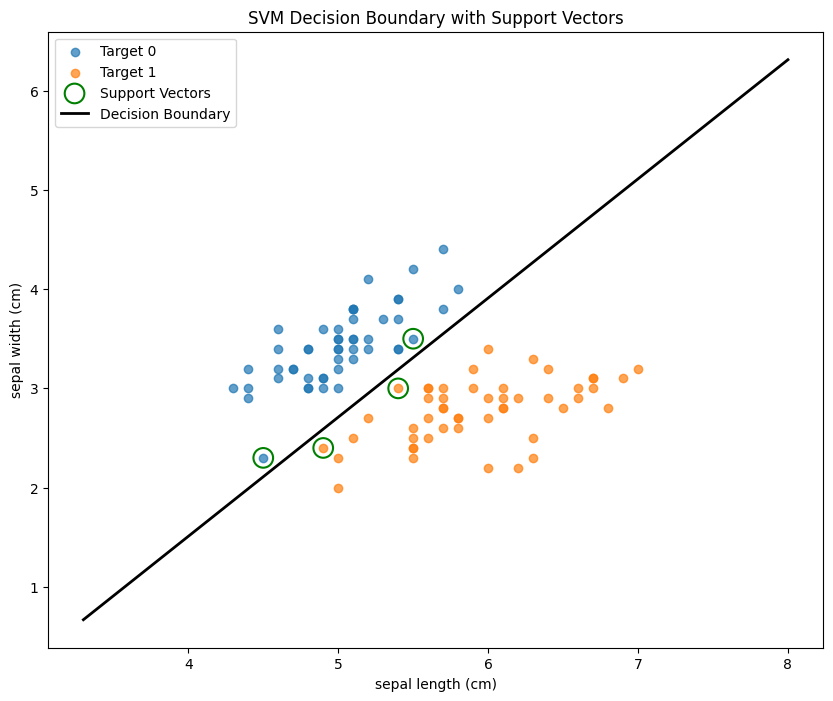

In [7]:
supvectors = SVMmodel.support_vectors_
# Plot the support vectors here

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[y_2d == 0, 0], X_2d[y_2d == 0, 1], label='Target 0', alpha=0.7)
plt.scatter(X_2d[y_2d == 1, 0], X_2d[y_2d == 1, 1], label='Target 1', alpha=0.7)
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=200, linewidth=1.5, facecolors='none', edgecolors='green', label='Support Vectors')

#Separating line coefficients:
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
x_boundary = ((-b - W[0] * x_min) / W[1], (-b - W[0] * x_max) / W[1])
plt.plot([x_min, x_max], x_boundary, 'k-', linewidth=2, label='Decision Boundary')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

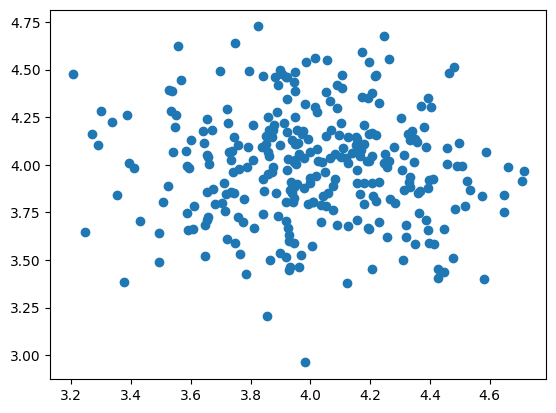

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

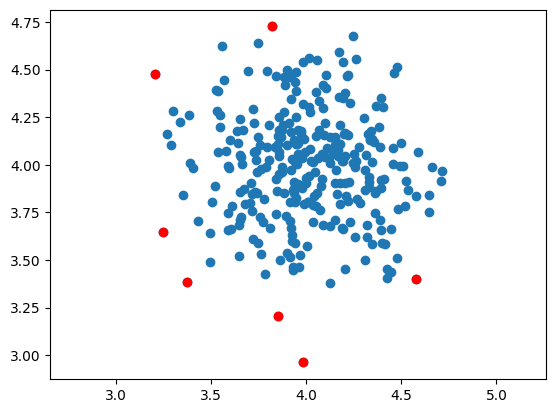

In [9]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

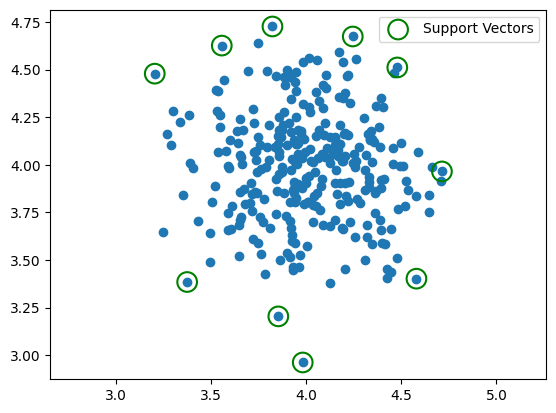

In [10]:
sup_vectors = SVMmodelOne.support_vectors_

plt.scatter(x[:,0], x[:,1])
plt.scatter(sup_vectors[:,0], sup_vectors[:,1], s=200, linewidth=1.5, facecolors='none', edgecolors='green', label='Support Vectors')
plt.legend()
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


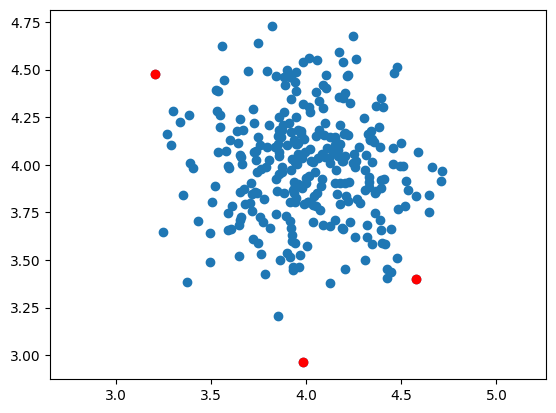

In [11]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)[0]
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()